In [664]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import sklearn
import category_encoders as ce


## Loading Data

In [522]:
customers_og = pd.read_json('customer-events.json')
customers= pd.json_normalize(customers_og['payload'])
customers['customerId'] = customers_og['customerId']
customers = customers.rename(columns={'detail.age':'age','detail.salary':'salary','detail.gender':'gender'})
customers = customers.iloc[:,[3,0,1,2]]
customers

,customerId,age,salary,gender
0,0f934b23c3acfb014542f4fecf7b3d7e,24,16406,female
1,36ae52212c1baaea8c15ad4175e427bd,29,19040,male
2,1da5dab587768c39574b9a398f8dee43,27,21087,female
3,033973a9a5427ab09f3a3ee15980f386,40,49111,female
4,f9ff8bd5263167078e5846c250232531,41,43777,female
...,...,...,...,...
19995,3d99458e347e61fcb6a805ea217f1b04,45,51937,male
19996,022e5a923458991fab6f695c0c4def33,20,14682,female
19997,f5ee70d21cf63c65d5a2aa7bfe8ff2aa,30,25563,male
19998,64126291a78b0949415681f9c9e8446d,24,15095,female


In [523]:
transactions_og= pd.read_json('transaction-events.json')
transactions= pd.json_normalize(transactions_og['payload'])
transactions['customerId'] = transactions_og.customerId
transactions['timestamp'] = transactions_og.timestamp
transactions= transactions.rename(columns={'transaction.amount':'transaction_amount','transaction.currency':'currency'})
transactions=transactions.iloc[:,[3,4,0,1,2]]
transactions

,customerId,timestamp,description,transaction_amount,currency
0,8be2e455cd42f6a50977c99eee4d4d14,2019-01-01 01:00:04,WELLCOME 370 (Grocery Stores and Supermarkets),95.9,HKD
1,b31e6e16d9f0cc4d1627621bbc4731c7,2019-01-01 01:00:12,STORMIES (Eating Places and Restaurants),485.6,HKD
2,a9f5dfdbfb2285bfd508e862e30087b3,2019-01-01 01:00:16,(rent),13531.8,HKD
3,fa159acecc4c559601c9a2fc35c75213,2019-01-01 01:00:25,A-1 BAKERY (Eating Places and Restaurants),456.6,HKD
4,8f2ad6912837fe09c3870459f699d6f9,2019-01-01 01:00:43,(rent),10274.0,USD
...,...,...,...,...,...
200400,291db767ac8b96128d048e4d7942ea4e,2019-02-01 00:58:17,CRVANGUARD SHOP 11 (Grocery Stores and Sup...,253.4,HKD
200401,e31f24d088ca0c3424672da4d6449020,2019-02-01 00:58:26,HONG KONG EXPRESS AIRW (Travel Agencies),1892.9,HKD
200402,f9a60987372b16f7fd526d5fc677927c,2019-02-01 00:58:32,MYDRESS HOLDINGS LIMIT (Shopping / Department ...,1347.7,HKD
200403,2a3b457f69ad5ac25068064074893db8,2019-02-01 00:59:43,(rent),12082.6,HKD


## Merging Data and enhancement

In [524]:
combined_data = transactions.merge(customers,how = 'left',left_on='customerId',right_on='customerId')
combined_data

,customerId,timestamp,description,transaction_amount,currency,age,salary,gender
0,8be2e455cd42f6a50977c99eee4d4d14,2019-01-01 01:00:04,WELLCOME 370 (Grocery Stores and Supermarkets),95.9,HKD,39,55922,male
1,b31e6e16d9f0cc4d1627621bbc4731c7,2019-01-01 01:00:12,STORMIES (Eating Places and Restaurants),485.6,HKD,25,19069,male
2,a9f5dfdbfb2285bfd508e862e30087b3,2019-01-01 01:00:16,(rent),13531.8,HKD,40,46272,male
3,fa159acecc4c559601c9a2fc35c75213,2019-01-01 01:00:25,A-1 BAKERY (Eating Places and Restaurants),456.6,HKD,37,32610,male
4,8f2ad6912837fe09c3870459f699d6f9,2019-01-01 01:00:43,(rent),10274.0,USD,41,72266,male
...,...,...,...,...,...,...,...,...
200400,291db767ac8b96128d048e4d7942ea4e,2019-02-01 00:58:17,CRVANGUARD SHOP 11 (Grocery Stores and Sup...,253.4,HKD,28,21875,male
200401,e31f24d088ca0c3424672da4d6449020,2019-02-01 00:58:26,HONG KONG EXPRESS AIRW (Travel Agencies),1892.9,HKD,45,88641,male
200402,f9a60987372b16f7fd526d5fc677927c,2019-02-01 00:58:32,MYDRESS HOLDINGS LIMIT (Shopping / Department ...,1347.7,HKD,24,14673,female
200403,2a3b457f69ad5ac25068064074893db8,2019-02-01 00:59:43,(rent),12082.6,HKD,30,28822,female


In [525]:
display(combined_data.describe())
display(combined_data.info())

,transaction_amount,age
count,200405.000000,200405.000000
mean,2062.512543,34.762576
std,2804.608384,10.358560
min,-10010.500000,15.000000
25%,693.100000,28.000000
50%,987.200000,33.000000
75%,2550.600000,39.000000
max,22672.400000,69.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200405 entries, 0 to 200404
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customerId          200405 non-null  object        
 1   timestamp           200405 non-null  datetime64[ns]
 2   description         200405 non-null  object        
 3   transaction_amount  200405 non-null  float64       
 4   currency            200405 non-null  object        
 5   age                 200405 non-null  int64         
 6   salary              200405 non-null  object        
 7   gender              200405 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 13.8+ MB


None

In [527]:
combined_data['Cat'] = combined_data['description'].str.extract(r'\(([^()]*)\)$')
#combined_data['Name'] = combined_data['description'].str.extract(r'^([^()]*)\s*\([^()]*\)$')
pattern = r'[^(]+'
combined_data['Name'] = combined_data['description'].str.findall(pattern)
combined_data['Name'] = combined_data['Name'].apply(lambda x:x[0])

### Fixing the Store Name column

In [528]:
combined_data['Name'] = combined_data['Name'].str.replace('ALIPAY *','')
combined_data['Name'] = combined_data['Name'].str.replace('AlipayHK *','')
helper_combined_1 = combined_data['Name'].str.split('-').str.get(0)
helper_combined_2 = combined_data['Name'].str.split('-').str.get(1)

C:\Users\leung\AppData\Local\Temp/ipykernel_11592/2616607288.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combined_data['Name'] = combined_data['Name'].str.replace('ALIPAY *','')
C:\Users\leung\AppData\Local\Temp/ipykernel_11592/2616607288.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  combined_data['Name'] = combined_data['Name'].str.replace('AlipayHK *','')


In [529]:
def Name4(df):
    if pd.isnull(df['Name2']) and isinstance(df['Name3'],float):
        return df['Name1']
    elif pd.isnull(df['Name2']):
        return df['Name1']
    else:
        return df['Name1'] +'- '+ df['Name2']

In [530]:
helper_df = pd.DataFrame(columns=['Name1','Name2'])
helper_df['Name1'] = helper_combined_1
helper_df['Name2'] = helper_combined_2
helper_df['Name3'] = pd.to_numeric(helper_df['Name2'],errors='coerce')
helper_df['Name4'] = helper_df.apply(Name4,axis=1)
combined_data['Name_2'] = helper_df['Name4']
#helper_df.groupby('Name4').count().reset_index()['Name4'].to_csv('helper2.csv')

In [531]:
helper_df_v2 = pd.read_csv('helperv3.csv')
combined_data = combined_data.merge(helper_df_v2,how='left',left_on=combined_data.Name_2,right_on = helper_df_v2.Name4)
combined_data = combined_data.drop(columns=['Name','Name_2','Name4','key_0'])
combined_data = combined_data.rename(columns={'Name5':'Store_Name'})

### Converting USD transaction into HKD. Conversion rate of 7.80

In [532]:
def convert_usd_to_hkd(df):
    if df['currency'] == 'USD':
        return df['transaction_amount'] * 7.75
    else:
        return df['transaction_amount']

In [533]:
combined_data['new_trans'] = combined_data.apply(convert_usd_to_hkd,axis=1)

## Merging from grouping Transactional category to customer dataset from ML models

In [986]:
customersV2 = customers
column_list = combined_data.Cat.unique()
customersV2 = customersV2.assign(**{c: 0 for c in column_list})
customersV2 = customersV2.set_index(customersV2.customerId)

In [987]:
cat_amount = combined_data.groupby(['customerId','Cat']).sum().reset_index()
cat_amount = cat_amount.drop(columns=['age','salary'])
for index, row in cat_amount.iterrows():
    customersV2.loc[row[0],row[1]]=row[2]

In [988]:
customersV2=customersV2.drop(columns=['customerId'])
customersV2 = customersV2.reset_index()

In [989]:
customersV2 = customersV2.assign(total = customersV2['Grocery Stores and Supermarkets'] + customersV2['Eating Places and Restaurants']
                                + customersV2['rent'] + customersV2['other']+customersV2['Shopping / Department Store']
                                + customersV2['Travel Agencies'])
customersV2

,customerId,age,salary,gender,age_group,Grocery Stores and Supermarkets,Eating Places and Restaurants,rent,other,Shopping / Department Store,Travel Agencies,total
0,0f934b23c3acfb014542f4fecf7b3d7e,24,16406,female,20-30,188.7,2066.0,0.0,140.9,0.0,32379.625,34775.225
1,36ae52212c1baaea8c15ad4175e427bd,29,19040,male,20-30,267.9,1463.0,10637.8,3688.0,0.0,0.000,16056.700
2,1da5dab587768c39574b9a398f8dee43,27,21087,female,20-30,286.9,861.7,13039.6,490.4,0.0,4300.400,18979.000
3,033973a9a5427ab09f3a3ee15980f386,40,49111,female,30-40,243.5,2338.3,0.0,922.6,2872.4,23090.200,29467.000
4,f9ff8bd5263167078e5846c250232531,41,43777,female,40-50,0.0,1182.9,14071.1,10083.3,928.9,0.000,26266.200
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3d99458e347e61fcb6a805ea217f1b04,45,51937,male,40-50,0.0,3145.1,14454.1,453.2,7121.0,5549.700,30723.100
19996,022e5a923458991fab6f695c0c4def33,20,14682,female,20-30,241.8,618.8,0.0,10250.5,0.0,2102.800,13213.900
19997,f5ee70d21cf63c65d5a2aa7bfe8ff2aa,30,25563,male,20-30,0.0,0.0,14664.6,753.7,2383.4,2413.700,20215.400
19998,64126291a78b0949415681f9c9e8446d,24,15095,female,20-30,166.8,1416.5,9850.1,675.6,1477.4,0.000,13586.400


In [991]:
to_num = ['age','salary']
for i in to_num:
    customersV2[i] = pd.to_numeric(combined_data_V2[i])
    customersV2[i] = combined_data_V2[i].astype(int)

### Exporting Data for Tableau

In [ ]:
combined_data.to_csv('tab_data.csv')

## Analysis

### Total transaction_amount based on transaction category

In [849]:
combined_data[combined_data.customerId=='0f934b23c3acfb014542f4fecf7b3d7e']

,customerId,timestamp,description,currency,age,salary,gender,Cat,Store_Name,new_trans,age_group
46804,0f934b23c3acfb014542f4fecf7b3d7e,2019-01-08,GENKI SUSHI - 5106 (Eating Places and Restaura...,HKD,24,16406,female,Eating Places and Restaurants,GENKI SUSHI,513.900,20-30
85594,0f934b23c3acfb014542f4fecf7b3d7e,2019-01-14,WELLCOME 345 (Grocery Stores and Supermarkets),HKD,24,16406,female,Grocery Stores and Supermarkets,WELLCOME,188.700,20-30
123147,0f934b23c3acfb014542f4fecf7b3d7e,2019-01-20,GENKI SUSHI - 5993 (Eating Places and Restaura...,HKD,24,16406,female,Eating Places and Restaurants,GENKI SUSHI,598.700,20-30
151923,0f934b23c3acfb014542f4fecf7b3d7e,2019-01-24,CE LA VI - SKYDECK HONG KONG (Eating Places an...,HKD,24,16406,female,Eating Places and Restaurants,CE LA VI - SKYDECK HONG KONG,953.400,20-30
154171,0f934b23c3acfb014542f4fecf7b3d7e,2019-01-24,HONG KONG EXPRESS AIRW (Travel Agencies),HKD,24,16406,female,Travel Agencies,HONG KONG EXPRESS AIRW,3100.000,20-30
159358,0f934b23c3acfb014542f4fecf7b3d7e,2019-01-25,(other),HKD,24,16406,female,other,,140.900,20-30
167434,0f934b23c3acfb014542f4fecf7b3d7e,2019-01-26,WING ON TRAVEL / HKWOT (Travel Agencies),USD,24,16406,female,Travel Agencies,WING ON TRAVEL / HKWOT,22973.325,20-30
196249,0f934b23c3acfb014542f4fecf7b3d7e,2019-01-31,TRIP.COM TRIP.COM (Travel Agencies),HKD,24,16406,female,Travel Agencies,TRIP COM,2812.800,20-30
199230,0f934b23c3acfb014542f4fecf7b3d7e,2019-01-31,TRIP COM (Travel Agencies),HKD,24,16406,female,Travel Agencies,TRIP COM,3493.500,20-30


In [379]:
helper = combined_data.groupby('customerId').sum().reset_index()
helper = helper[['customerId','new_trans']]

In [380]:
helper=pd.DataFrame(helper)
helper[helper.customerId=='8be2e455cd42f6a50977c99eee4d4d14']

,customerId,new_trans
10862,8be2e455cd42f6a50977c99eee4d4d14,38225.9


In [365]:
bins = [0, 19, 30, 40, 50,70]
labels = ['<20', '20-30', '30-40', '40-50','>50']
age_dis = customers
age_dis['age_group'] = pd.cut(age_dis.age,bins=bins,labels = labels)
age_dis = age_dis.groupby('age_group').count().reset_index()

0        55922
1        19069
2        46272
3        32610
4        72266
         ...  
19995    14114
19996    11643
19997        0
19998        0
19999        0
Name: salary, Length: 20000, dtype: object

In [389]:
combined_data[combined_data.customerId=='9c7eae0c470302045fc7e20c147b1929']

,customerId,timestamp,description,transaction_amount,currency,age,salary,gender,Cat,Store_Name,new_trans,dayoftheweek
7720,9c7eae0c470302045fc7e20c147b1929,2019-01-02 05:40:40,(rent),10341.8,USD,23,15410,male,rent,,80148.95,2
74885,9c7eae0c470302045fc7e20c147b1929,2019-01-12 14:01:23,(other),2528.6,HKD,23,15410,male,other,,2528.60,5


In [427]:
combined_data[combined_data.dayoftheweek==0]

,customerId,timestamp,description,transaction_amount,currency,age,salary,gender,Cat,Store_Name,new_trans,dayoftheweek,age_group
38624,514a3b456e0210d56318d57ebae8eb66,2019-01-07 00:00:26,IKEA THE DAIRY FARM CO (Shopping / Department ...,1053.3,HKD,24,14660,female,Shopping / Department Store,IKEA,1053.3,0,20-30
38625,4e63361cd0dcc45cffbcd0896f1c8154,2019-01-07 00:00:30,MUJI - METROPLAZA (Shopping / Department Store),775.6,HKD,65,47317,male,Shopping / Department Store,MUJI,775.6,0,>50
38626,5e3bee80611b37f4e3587e491eabe27f,2019-01-07 00:00:48,HONG KONG EXPRESS AIRW (Travel Agencies),4714.8,HKD,33,30564,male,Travel Agencies,HONG KONG EXPRESS AIRW,4714.8,0,30-40
38627,b0de5f11b1679980c2083c5143e0472c,2019-01-07 00:00:53,BAOZUN C/O NIKE HK (Shopping / Department Store),980.5,HKD,32,31581,male,Shopping / Department Store,BAOZUN C/O NIKE HK,980.5,0,30-40
38628,0b9e782ad1ec3d0bf8d98685efa6bfbe,2019-01-07 00:01:03,TASTE 296 NHC SS QPS (Grocery Stores and Sup...,311.6,HKD,40,31279,female,Grocery Stores and Supermarkets,TASTE,311.6,0,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181395,74f807fb685227e62a686b39169e05b7,2019-01-28 23:58:49,(other),2120.7,HKD,46,27934,female,other,,2120.7,0,40-50
181396,3ad53aeb8b32b4a391c628a84001855f,2019-01-28 23:58:54,TEN REN TEA (Eating Places and Restaurants),755.3,HKD,53,56278,male,Eating Places and Restaurants,TEN REN TEA,755.3,0,>50
181397,9f8cba2513573e4c936cc29dd7f8edb2,2019-01-28 23:59:05,ALIPAY *Japan Home Ce (Shopping / Department S...,1049.6,HKD,28,22544,female,Shopping / Department Store,Japan Home Ce,1049.6,0,20-30
181398,74a14dc6be3d469770f53dd3fb93c6c4,2019-01-28 23:59:20,ASICS HONGKONG LIMITED (Shopping / Department ...,964.5,HKD,17,0,female,Shopping / Department Store,ASICS HONGKONG LIMITED,964.5,0,<20


In [539]:
cat_trans= combined_data.groupby('Cat').transaction_amount.sum()
cat_trans = cat_trans.to_frame().reset_index()
cat_trans = cat_trans.sort_values(by='transaction_amount',ascending=False)
cat_trans

,Cat,transaction_amount
3,Travel Agencies,128333761.9
5,rent,113410144.7
4,other,67782948.5
0,Eating Places and Restaurants,53522804.1
2,Shopping / Department Store,45788967.2
1,Grocery Stores and Supermarkets,5134805.6


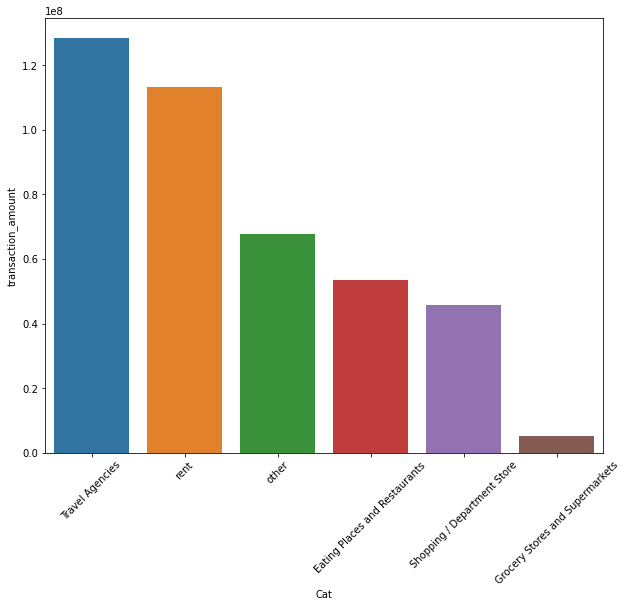

In [540]:
plt.figure(figsize=(10, 8))
sns.barplot(x=cat_trans.Cat,y=cat_trans.transaction_amount)
plt.xticks(rotation=45)
plt.show()

In [272]:
combined_data.currency.unique()

array(['HKD', 'USD'], dtype=object)

### Transaction breakdown into days

<AxesSubplot:xlabel='dayoftheweek', ylabel='transaction_amount'>

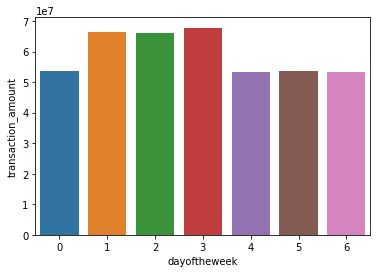

In [290]:
day_dis = combined_data
day_dis['dayoftheweek'] = combined_data['timestamp'].dt.dayofweek
day_dis = day_dis.groupby('dayoftheweek').sum('transaction_amount').reset_index()
sns.barplot(x=day_dis.dayoftheweek,y =day_dis.transaction_amount)

### Transaction frequency breakdown into days

<AxesSubplot:xlabel='dayoftheweek', ylabel='new_trans'>

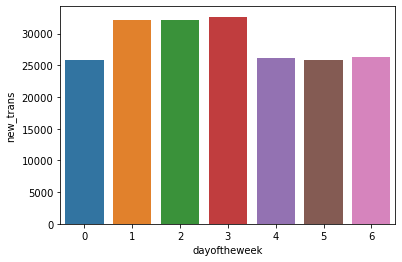

In [291]:
freq_day = combined_data
freq_day['dayoftheweek'] = combined_data['timestamp'].dt.dayofweek
freq_day = freq_day.groupby('dayoftheweek').count().reset_index()
sns.barplot(x=freq_day.dayoftheweek,y=freq_day.new_trans)

### Distrubution of users

#### Age

<AxesSubplot:xlabel='age_group', ylabel='customerId'>

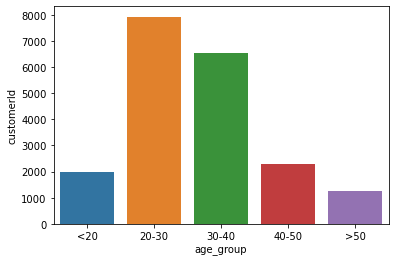

In [541]:
bins = [0, 19, 30, 40, 50,70]
labels = ['<20', '20-30', '30-40', '40-50','>50']
age_dis = customers
age_dis['age_group'] = pd.cut(age_dis.age,bins=bins,labels = labels)
age_dis = age_dis.groupby('age_group').count().reset_index()
sns.barplot(x=age_dis.age_group,y=age_dis.customerId)

#### Gender

<AxesSubplot:xlabel='gender', ylabel='customerId'>

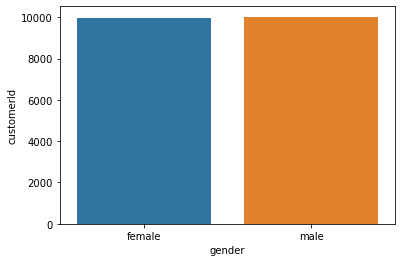

In [542]:
gender_dis = customers.groupby('gender').count().reset_index()
sns.barplot(x=gender_dis.gender,y=gender_dis.customerId)

#### Salary vs age

<AxesSubplot:xlabel='age', ylabel='salary'>

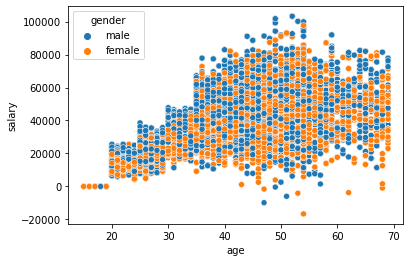

In [605]:
sns.scatterplot(y=combined_data.salary,x=combined_data.age,hue=combined_data.gender)

In [621]:
combined_data['timestamp']=combined_data.timestamp.apply(lambda x:x.date())


0         2019-01-01
1         2019-01-01
2         2019-01-01
3         2019-01-01
4         2019-01-01
             ...    
201055    2019-02-01
201056    2019-02-01
201057    2019-02-01
201058    2019-02-01
201059    2019-02-01
Name: timestamp, Length: 201060, dtype: object

### Transaction vs Time

<AxesSubplot:xlabel='timestamp', ylabel='new_trans'>

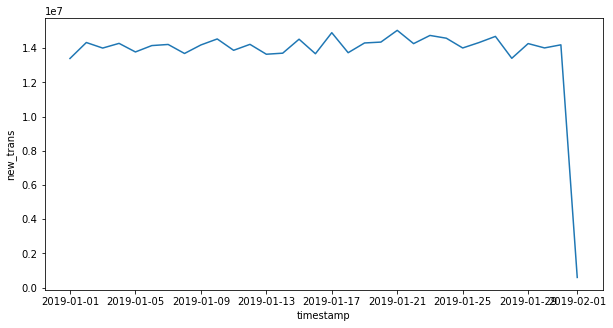

In [635]:
helper = combined_data.groupby('timestamp').sum()
plt.figure(figsize=(10,5))
sns.lineplot(x=helper.index,y=helper.new_trans)

#### Correlation Matrix

<AxesSubplot:>

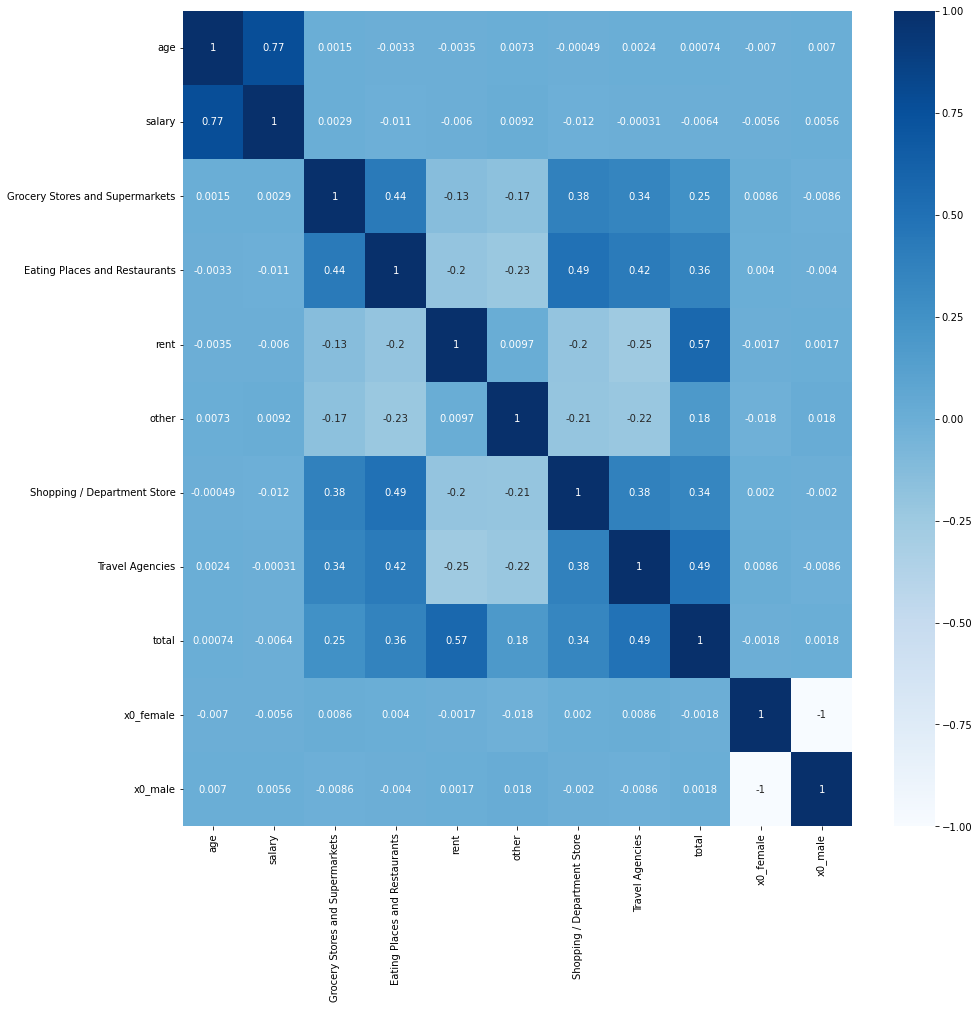

In [884]:
plt.figure(figsize=(15,15))
sns.heatmap(customersV2.corr(),annot=True,cmap="Blues")

## Preprocessing

### OneHotEncoding for gender column

In [ ]:
combined_data=combined_data.drop(columns=['transaction_amount'])
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
#to_encode = customersV2[['gender']].to_numpy()
one_hot = one_hot_encoder.fit_transform(to_encode)
one_hot_df = pd.DataFrame(one_hot.toarray(),columns=one_hot_encoder.get_feature_names())
customersV2 = pd.concat([customersV2,one_hot_df],axis=1)
#customersV2 = customersV2.drop(columns=['age_group','gender'])
customers_KM = customersV2.drop(columns=['customerId'])

## KNN 

In [1040]:
customers_kNN = customersV2.drop(columns=['customerId','gender','age_group'])

Text(0, 0.5, 'SSE')

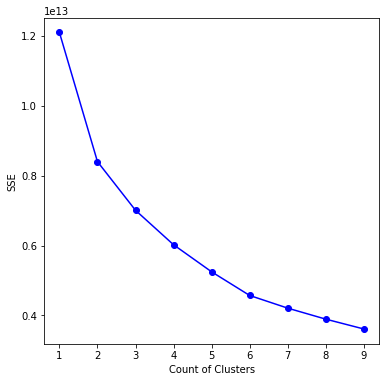

In [1041]:
sse = []
for k in range(1, 10):
    km = KMeans(n_clusters=k)
    km.fit(customers_kNN)
    sse.append(km.inertia_)

# plot to identify the elbow
plt.figure(figsize=(6, 6))
plt.plot(range(1, 10), sse, '-o', c = 'blue')
plt.xlabel('Count of Clusters')
plt.ylabel('SSE')

In [1042]:
km = KMeans(n_clusters=3)
km.fit(customers_kNN)
km.cluster_centers_
a = km.fit_predict(customers_kNN)

In [1045]:
km.fit_predict(customers_kNN)

array([1, 0, 1, ..., 0, 0, 0])

In [1048]:
customers_KM['KM_group'] = km.fit_predict(customers_kNN)
customers_KM

,age,salary,Grocery Stores and Supermarkets,Eating Places and Restaurants,rent,other,Shopping / Department Store,Travel Agencies,total,x0_female,x0_male,KM_group
0,39,55922,188.7,2066.0,0.0,140.9,0.0,32379.625,34775.225,1.0,0.0,0
1,25,19069,267.9,1463.0,10637.8,3688.0,0.0,0.000,16056.700,0.0,1.0,2
2,40,46272,286.9,861.7,13039.6,490.4,0.0,4300.400,18979.000,1.0,0.0,0
3,37,32610,243.5,2338.3,0.0,922.6,2872.4,23090.200,29467.000,1.0,0.0,1
4,41,72266,0.0,1182.9,14071.1,10083.3,928.9,0.000,26266.200,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,27,20972,0.0,3145.1,14454.1,453.2,7121.0,5549.700,30723.100,0.0,1.0,1
19996,41,67153,241.8,618.8,0.0,10250.5,0.0,2102.800,13213.900,1.0,0.0,0
19997,38,28139,0.0,0.0,14664.6,753.7,2383.4,2413.700,20215.400,0.0,1.0,2
19998,26,14835,166.8,1416.5,9850.1,675.6,1477.4,0.000,13586.400,1.0,0.0,2


<AxesSubplot:xlabel='salary', ylabel='total'>

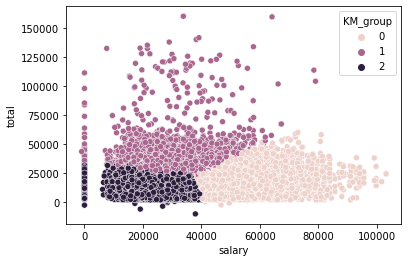

In [1051]:
sns.scatterplot(x=customers_KM.salary,y=customers_KM.total,hue=customers_KM.KM_group)


,age,salary,Grocery Stores and Supermarkets,Eating Places and Restaurants,rent,other,Shopping / Department Store,Travel Agencies,total,x0_female,x0_male,KM_group,precent_spent
0,39,55922,188.7,2066.0,0.0,140.9,0.0,32379.625,34775.225,1.0,0.0,0,0.621852
1,25,19069,267.9,1463.0,10637.8,3688.0,0.0,0.000,16056.700,0.0,1.0,2,0.842032
2,40,46272,286.9,861.7,13039.6,490.4,0.0,4300.400,18979.000,1.0,0.0,0,0.410162
3,37,32610,243.5,2338.3,0.0,922.6,2872.4,23090.200,29467.000,1.0,0.0,1,0.903619
4,41,72266,0.0,1182.9,14071.1,10083.3,928.9,0.000,26266.200,1.0,0.0,0,0.363466
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,27,20972,0.0,3145.1,14454.1,453.2,7121.0,5549.700,30723.100,0.0,1.0,1,1.464958
19996,41,67153,241.8,618.8,0.0,10250.5,0.0,2102.800,13213.900,1.0,0.0,0,0.196773
19997,38,28139,0.0,0.0,14664.6,753.7,2383.4,2413.700,20215.400,0.0,1.0,2,0.718412
19998,26,14835,166.8,1416.5,9850.1,675.6,1477.4,0.000,13586.400,1.0,0.0,2,0.915834


In [1104]:
customers_KM[(customers_KM.precent_spent<0.682)]

,age,salary,Grocery Stores and Supermarkets,Eating Places and Restaurants,rent,other,Shopping / Department Store,Travel Agencies,total,x0_female,x0_male,KM_group,precent_spent
0,39,55922,188.7,2066.0,0.0,140.9,0.0,32379.625,34775.225,1.0,0.0,0,0.621852
2,40,46272,286.9,861.7,13039.6,490.4,0.0,4300.400,18979.000,1.0,0.0,0,0.410162
4,41,72266,0.0,1182.9,14071.1,10083.3,928.9,0.000,26266.200,1.0,0.0,0,0.363466
9,39,45359,691.0,3507.4,0.0,1254.5,0.0,7103.400,12556.300,0.0,1.0,0,0.276820
12,30,35974,0.0,2957.2,0.0,554.1,0.0,13423.900,16935.200,0.0,1.0,2,0.470762
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,37,52747,0.0,0.0,0.0,4231.9,0.0,0.000,4231.900,0.0,1.0,0,0.080230
19993,37,48218,698.8,2507.1,0.0,1661.3,2992.9,22409.700,30269.800,1.0,0.0,0,0.627770
19994,27,22042,258.6,692.5,0.0,672.0,2962.3,2002.600,6588.000,1.0,0.0,2,0.298884
19996,41,67153,241.8,618.8,0.0,10250.5,0.0,2102.800,13213.900,1.0,0.0,0,0.196773


## KM with PCA

### OneHotEncoding for categorical columns

In [1100]:
customersV2.iloc[13,:]

customerId                         165e05566c69c5d41af6a637e2be39aa
age                                                              20
salary                                                        10603
gender                                                         male
age_group                                                       >50
Grocery Stores and Supermarkets                                 0.0
Eating Places and Restaurants                                2690.7
rent                                                        20369.6
other                                                        2835.5
Shopping / Department Store                                   730.5
Travel Agencies                                              5824.3
total                                                       32450.6
x0_female                                                       0.0
x0_male                                                         1.0
Name: 13, dtype: object

In [1044]:
customers_KM_pca = customersV2.drop(columns=['gender','customerId','age_group'])

In [1061]:
from sklearn.preprocessing import StandardScaler
customers_pca = StandardScaler().fit_transform(customers_KM_pca)
customers_pca

array([[ 0.40034819,  1.28039074, -0.22588283, ...,  1.07779722,
         1.00230265, -1.00230265],
       [-0.93915295, -0.91420641, -0.01953019, ..., -0.49967488,
        -0.99770264,  0.99770264],
       [ 0.49602684,  0.70573297,  0.0299736 , ..., -0.25340298,
         1.00230265, -1.00230265],
       ...,
       [ 0.30466953, -0.37408767, -0.71753364, ..., -0.14920746,
        -0.99770264,  0.99770264],
       [-0.8434743 , -1.16634123, -0.28294246, ..., -0.70785524,
         1.00230265, -1.00230265],
       [-0.17372373, -0.63932349, -0.71753364, ..., -1.12775545,
         1.00230265, -1.00230265]])

### PCA 

In [1062]:

from sklearn.decomposition import PCA

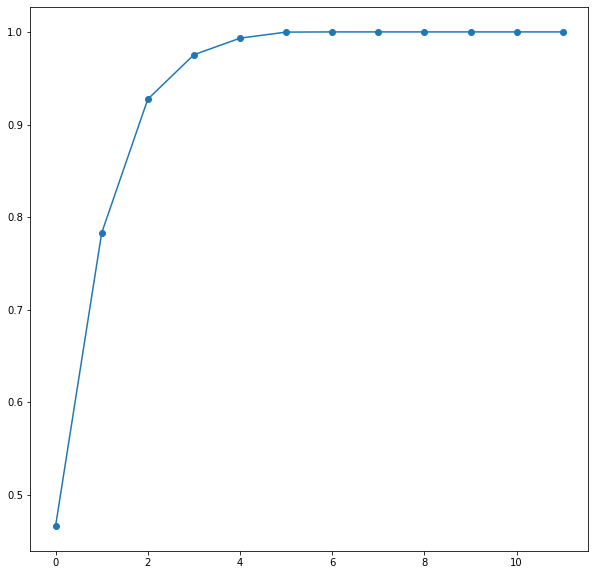

In [1063]:
pca = PCA()
pca.fit(customers_KM)
pca.explained_variance_ratio_
plt.figure(figsize=(10,10))
plt.plot(pca.explained_variance_ratio_.cumsum(),marker = 'o')

In [1064]:
pca=PCA(n_components=3)
pca_score = pca.fit_transform(customers_KM)

Text(0, 0.5, 'SSE')

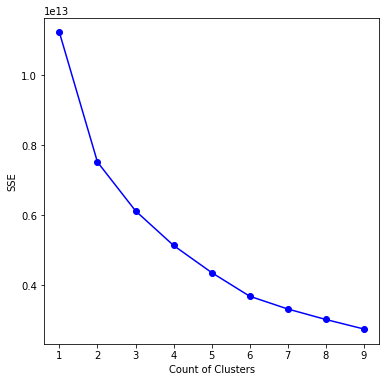

In [1065]:
sse = []
for k in range(1, 10):
    km = KMeans(n_clusters=k)
    km.fit(pca_score)
    sse.append(km.inertia_)

# plot to identify the elbow
plt.figure(figsize=(6, 6))
plt.plot(range(1, 10), sse, '-o', c = 'blue')
plt.xlabel('Count of Clusters')
plt.ylabel('SSE')

In [1066]:
kmean_pca = KMeans(n_clusters=3)
kmean_pca.fit(pca_score)
pca_df = pd.DataFrame(pca_score)

In [1067]:
customers_KM_pca = pd.concat([customers_KM, pca_df], axis=1)
customers_KM_pca.columns.values[-3:] = ['com_1','com2','com3']
customers_KM_pca['KM_group'] = kmean_pca.labels_
customers_KM_pca


,age,salary,Grocery Stores and Supermarkets,Eating Places and Restaurants,rent,other,Shopping / Department Store,Travel Agencies,total,x0_female,x0_male,KM_group,com_1,com2,com3
0,39,55922,188.7,2066.0,0.0,140.9,0.0,32379.625,34775.225,1.0,0.0,2,21314.303281,12288.598440,-23705.582540
1,25,19069,267.9,1463.0,10637.8,3688.0,0.0,0.000,16056.700,0.0,1.0,0,-15284.286038,-4228.753668,9725.441444
2,40,46272,286.9,861.7,13039.6,490.4,0.0,4300.400,18979.000,1.0,0.0,2,11832.979691,526.629433,7711.360889
3,37,32610,243.5,2338.3,0.0,922.6,2872.4,23090.200,29467.000,1.0,0.0,1,-1902.547477,5940.692376,-16698.813083
4,41,72266,0.0,1182.9,14071.1,10083.3,928.9,0.000,26266.200,1.0,0.0,2,37737.812975,7297.104626,9694.895730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,27,20972,0.0,3145.1,14454.1,453.2,7121.0,5549.700,30723.100,0.0,1.0,1,-13671.721757,11244.967461,3371.899353
19996,41,67153,241.8,618.8,0.0,10250.5,0.0,2102.800,13213.900,1.0,0.0,2,32949.780519,-10599.012723,2464.484733
19997,38,28139,0.0,0.0,14664.6,753.7,2383.4,2413.700,20215.400,0.0,1.0,0,-6329.439902,1801.681501,9527.510049
19998,26,14835,166.8,1416.5,9850.1,675.6,1477.4,0.000,13586.400,1.0,0.0,0,-19485.227566,-6844.575664,9456.623083


<AxesSubplot:xlabel='com2', ylabel='com_1'>

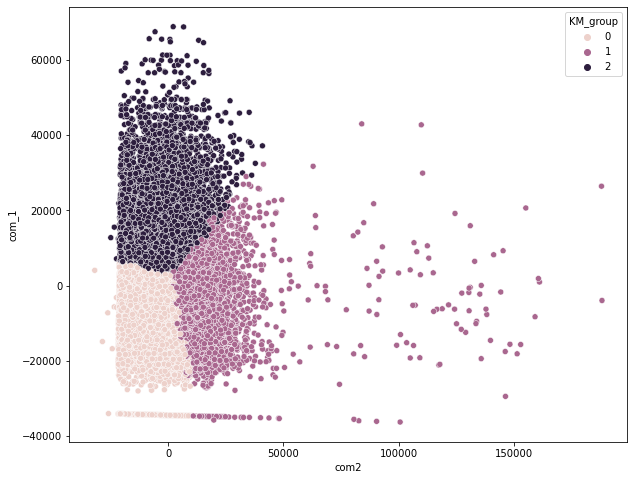

In [1068]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=customers_KM_pca['com2'],y=customers_KM_pca['com_1'],hue=customers_KM_pca['KM_group'])

<AxesSubplot:xlabel='total', ylabel='salary'>

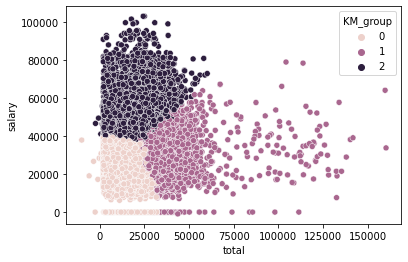

In [1081]:
sns.scatterplot(x=customers_KM_pca.total,y=customers_KM_pca.salary,hue=customers_KM_pca['KM_group'])

In [1060]:
customers_KM_pca

,age,salary,Grocery Stores and Supermarkets,Eating Places and Restaurants,rent,other,Shopping / Department Store,Travel Agencies,total,x0_female,x0_male
0,39,55922,188.7,2066.0,0.0,140.9,0.0,32379.625,34775.225,1.0,0.0
1,25,19069,267.9,1463.0,10637.8,3688.0,0.0,0.000,16056.700,0.0,1.0
2,40,46272,286.9,861.7,13039.6,490.4,0.0,4300.400,18979.000,1.0,0.0
3,37,32610,243.5,2338.3,0.0,922.6,2872.4,23090.200,29467.000,1.0,0.0
4,41,72266,0.0,1182.9,14071.1,10083.3,928.9,0.000,26266.200,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19995,27,20972,0.0,3145.1,14454.1,453.2,7121.0,5549.700,30723.100,0.0,1.0
19996,41,67153,241.8,618.8,0.0,10250.5,0.0,2102.800,13213.900,1.0,0.0
19997,38,28139,0.0,0.0,14664.6,753.7,2383.4,2413.700,20215.400,0.0,1.0
19998,26,14835,166.8,1416.5,9850.1,675.6,1477.4,0.000,13586.400,1.0,0.0
